# Training a CellPose2 model

This notebook trains CellPose2 models with the data in the demo_train_test_data folder. The models will then be stored in a models folder in this project. This notebook should serve as the basis for then making more generalist models with the available data in Omero.

## Displaying the data

We will first be extracting the displaying the images in the demo data folder.

In [2]:
#Putting all training input data and training ground truth data into two different arrays
import os
train_dir = "C:/Users/rz200/Downloads/celldev/cell-SCT/demo_train_test_data/data_for_masks_training"
directory = os.fsencode(train_dir)
train_input = [(train_dir+'/'+os.fsdecode(file)).replace('/','//') for file in os.listdir(directory) if os.fsdecode(file).endswith('.tiff')]
train_gt = [(train_dir+'/'+os.fsdecode(file)).replace('/','//') for file in os.listdir(directory) if os.fsdecode(file).endswith('.npy')]

#Same for testing data
test_dir = "C:/Users/rz200/Downloads/celldev/cell-SCT/demo_train_test_data/data_for_masks_testing"
directory = os.fsencode(test_dir)
test_input = [(test_dir+'/'+os.fsdecode(file)).replace('/','//') for file in os.listdir(directory) if os.fsdecode(file).endswith('.tiff')]
test_gt = [(test_dir+'/'+os.fsdecode(file)).replace('/','//') for file in os.listdir(directory) if os.fsdecode(file).endswith('.npy')]

print('Number of training images: {}'.format(len(train_input)))
print('Number of training gt: {}'.format(len(train_gt)))
print('Number of testing images: {}'.format(len(test_input)))
print('Number of testing gt: {}'.format(len(test_gt)))

Number of training images: 5
Number of training gt: 5
Number of testing images: 5
Number of testing gt: 5


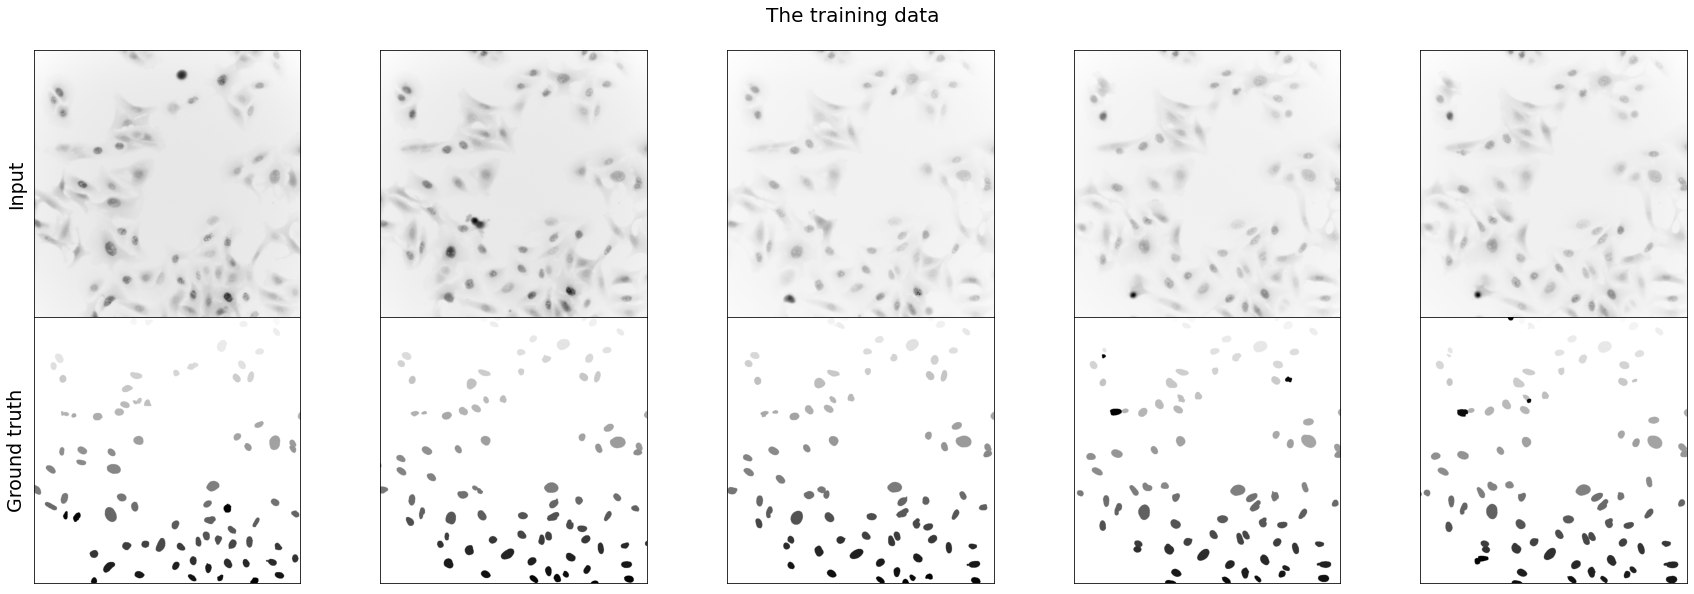

In [3]:
#Displaying the training data
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(24,8))
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.suptitle("The training data", y=1.05, fontsize=20)
for i in range(10):
    plt.subplot(2,5,i+1)

    if i == 0: plt.ylabel('Input',fontsize=19)
    elif i == 5: plt.ylabel('Ground truth',fontsize=19)

    if i < 5: img = plt.imread(train_input[i])
    else:
        seg = np.load(train_gt[i-5], allow_pickle=True).item()
        img = seg['masks'].squeeze()

    plt.imshow(img, cmap='gray_r')
    plt.xticks([]),plt.yticks([])
plt.show()

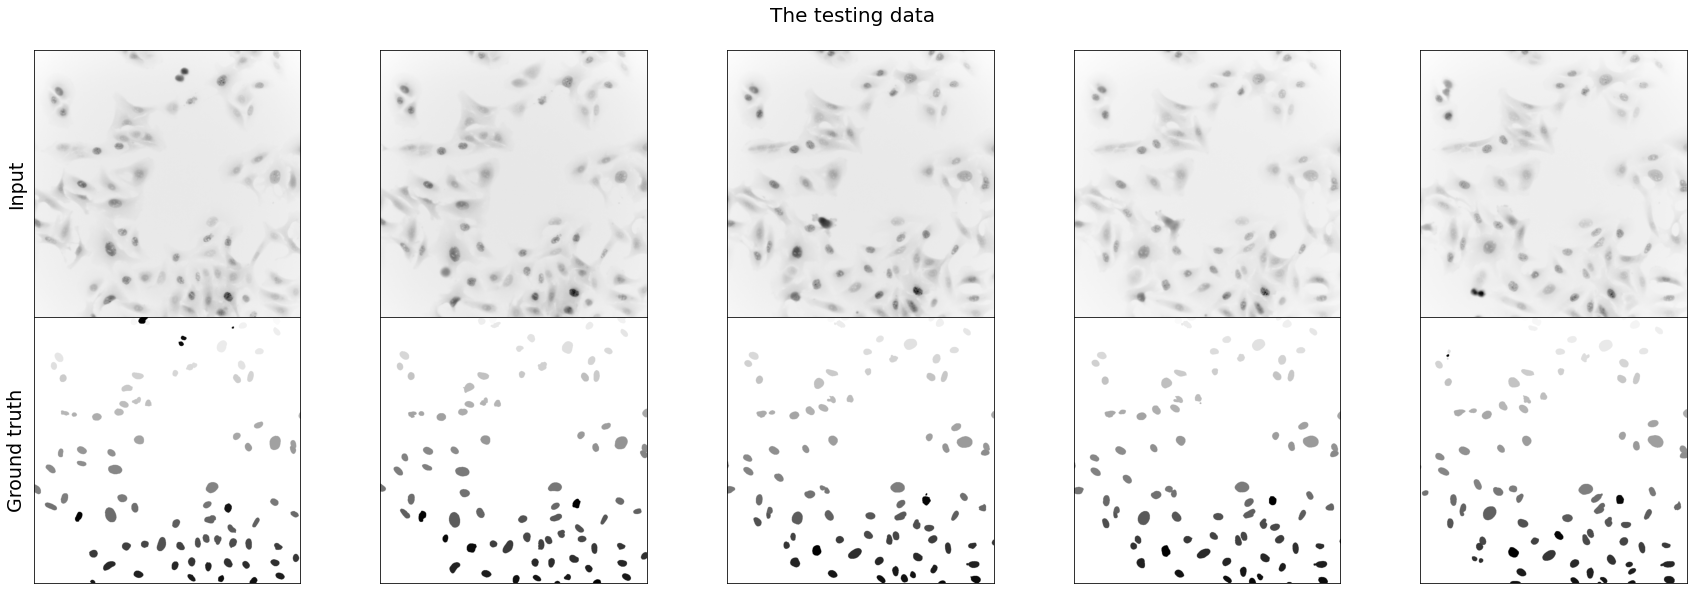

In [4]:
#Displaying the testing data

fig, ax = plt.subplots(figsize=(24,8))
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.suptitle("The testing data", y=1.05, fontsize=20)
for i in range(10):
    plt.subplot(2,5,i+1)

    if i == 0: plt.ylabel('Input',fontsize=19)
    elif i == 5: plt.ylabel('Ground truth',fontsize=19)

    if i < 5: img = plt.imread(test_input[i])
    else:
        seg = np.load(test_gt[i-5], allow_pickle=True).item()
        img = seg['masks'].squeeze()

    plt.imshow(img, cmap='gray_r')
    plt.xticks([]),plt.yticks([])
plt.show()

## Training a model with our data

In [5]:
#Checking if the GPU is activated
from cellpose import core, utils, io, models, metrics
use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

>>> GPU activated? YES


In [7]:
#Setting up the model with the train-test data
logger = io.logger_setup() #prints training ETA at each epoch
model = models.CellposeModel(gpu=use_GPU, model_type='nuclei') #defining the model, we're looking for nuclei, I should have named it 'demo_model' as it is in the files
channels = [0,0] #first 0: grayscale; second 0: None
output = io.load_train_test_data(train_dir.replace('/','\\'), test_dir, mask_filter='_seg.npy') #apart from the "_seg.npy" the files and their segmentations need to have the same name
train_data, train_labels, _, test_data, test_labels, _ = output
n_epochs = 100
learning_rate = 0.1
weight_decay = 0.0001
model_name = 'demo_model'

creating new log file
2022-06-24 13:09:07,964 [INFO] WRITING LOG OUTPUT TO C:\Users\rz200\.cellpose\run.log
2022-06-24 13:09:07,965 [INFO] >> nuclei << model set to be used
2022-06-24 13:09:07,972 [INFO] ** TORCH CUDA version installed and working. **
2022-06-24 13:09:07,973 [INFO] >>>> using GPU
2022-06-24 13:09:08,171 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2022-06-24 13:09:08,174 [INFO] not all flows are present, running flow generation for all images
2022-06-24 13:09:08,315 [INFO] 5 / 5 images in C:\Users\rz200\Downloads\celldev\cell-SCT\demo_train_test_data\data_for_masks_training folder have labels
2022-06-24 13:09:08,317 [INFO] not all flows are present, running flow generation for all images
2022-06-24 13:09:08,466 [INFO] 5 / 5 images in C:/Users/rz200/Downloads/celldev/cell-SCT/demo_train_test_data/data_for_masks_testing folder have labels


In [8]:
#Training the model
new_model_path = model.train(train_data, train_labels,
                             test_data=test_data,
                             test_labels=test_labels,
                             channels=channels,
                             save_path=train_dir,
                             n_epochs=n_epochs,
                             learning_rate=learning_rate,
                             weight_decay=weight_decay,
                             nimg_per_epoch=8,
                             model_name=model_name)

2022-06-24 13:09:12,477 [INFO] computing flows for labels


100%|██████████| 5/5 [00:00<00:00,  7.28it/s]


2022-06-24 13:09:13,305 [INFO] computing flows for labels


100%|██████████| 5/5 [00:00<00:00,  7.30it/s]


2022-06-24 13:09:14,275 [INFO] >>>> median diameter set to = 17
2022-06-24 13:09:14,276 [INFO] >>>> mean of training label mask diameters (saved to model) 32.668
2022-06-24 13:09:14,278 [INFO] >>>> training network with 2 channel input <<<<
2022-06-24 13:09:14,279 [INFO] >>>> LR: 0.10000, batch_size: 8, weight_decay: 0.00010
2022-06-24 13:09:14,280 [INFO] >>>> ntrain = 5, ntest = 5
2022-06-24 13:09:14,281 [INFO] >>>> nimg_per_epoch = 8
2022-06-24 13:09:17,891 [INFO] Epoch 0, Time  3.6s, Loss 0.1778, Loss Test 0.1386, LR 0.0000
2022-06-24 13:09:18,479 [INFO] saving network parameters to C:/Users/rz200/Downloads/celldev/cell-SCT/demo_train_test_data/data_for_masks_training\models/demo_model
2022-06-24 13:09:21,003 [INFO] Epoch 5, Time  6.7s, Loss 0.1553, Loss Test 0.0968, LR 0.0556
2022-06-24 13:09:24,033 [INFO] Epoch 10, Time  9.8s, Loss 0.0908, Loss Test 0.0722, LR 0.1000
2022-06-24 13:09:30,063 [INFO] Epoch 20, Time 15.8s, Loss 0.0923, Loss Test 0.0601, LR 0.1000
2022-06-24 13:09:35,9

## Evaluating the demo_model on our testing data

Here we will show the predictions of our demo_model on our testing images.

In [17]:
#First is the performance check from the CellPose2 function
#I need to add comments to this
diam_labels = model.diam_labels.copy() #diameter of labels in training images
output = io.load_train_test_data(test_dir, mask_filter='_seg.npy')
test_data, test_labels = output[:2]
predicted_test_masks = model.eval(test_data,
                   channels=channels,
                   diameter=diam_labels)[0]

#Checking the performance
ap = metrics.average_precision(test_labels, masks)[0]
print('')
print(f'>>> average precision at iou threshold 0.5 = {ap[:,0].mean():.3f}')

2022-06-24 13:49:52,003 [INFO] not all flows are present, running flow generation for all images
2022-06-24 13:49:52,154 [INFO] 5 / 5 images in C:/Users/rz200/Downloads/celldev/cell-SCT/demo_train_test_data/data_for_masks_testing folder have labels
2022-06-24 13:49:57,706 [INFO] 100%|##########| 5/5 [00:05<00:00,  1.11s/it]

>>> average precision at iou threshold 0.5 = 0.823


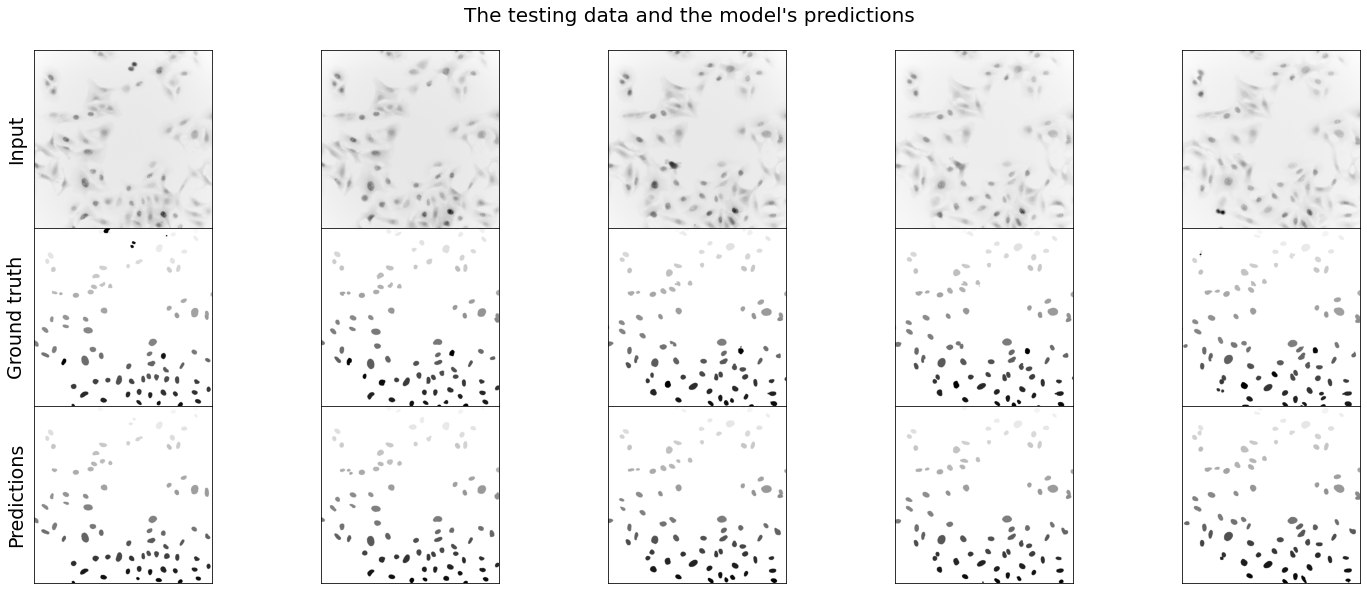

In [29]:
#Plotting images of the predictions on the testing data
fig, ax = plt.subplots(figsize=(20,8))
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.suptitle("The testing data and the model's predictions", y=1.05, fontsize=20)
for i in range(15):
    plt.subplot(3,5,i+1)

    if i == 0: plt.ylabel('Input',fontsize=19)
    elif i == 5: plt.ylabel('Ground truth',fontsize=19)
    elif i == 10: plt.ylabel('Predictions',fontsize=19)

    if i < 5: img = plt.imread(test_input[i])
    elif i < 10: img = test_labels[i-5]
    else: img = predicted_test_masks[i-10]

    plt.imshow(img, cmap='gray_r')
    plt.xticks([]),plt.yticks([])
plt.show()

In [57]:
#Storing the predicted masks into a folder in demo_train_test_data
# first check if the folder exists and if there's files in it
from os.path import exists

if not exists('C:\\Users\\rz200\\Downloads\\celldev\\cell-SCT\\demo_train_test_data\\test_data_predictions'):
    print("Making folder 'test_data_predictions' to store the predictions in")
    os.mkdir('C:\\Users\\rz200\\Downloads\\celldev\\cell-SCT\\demo_train_test_data\\test_data_predictions')
else: print("Folder 'test_data_predictions' already exists")

#get all of the names in the data_for_masks_testing folder so that we have the name to give the predictions
#put the masks in the test_data_predictions folder

path_to_names = 'C:\\Users\\rz200\\Downloads\\celldev\\cell-SCT\\demo_train_test_data\\data_for_masks_testing'
path_to_predictions =  'C:\\Users\\rz200\\Downloads\\celldev\\cell-SCT\\demo_train_test_data\\test_data_predictions'
names = [name[:7] for name in os.listdir(path_to_names) if name.endswith('.tiff')]
for i in range(len(predicted_test_masks)):
    #complete_path = os.path.join(path_to_predictions, names[i])
    #file = open(complete_path)
    #file = open(path_to_predictions)
    #file.write(predicted_test_masks[i])
    np.save(os.path.join(path_to_predictions, names[i]), predicted_test_masks[i])

Folder 'test_data_predictions' already exists


In [46]:
print(masks[4s])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
import shutil
shutil.rmtree('C:\\Users\\rz200\\Downloads\\celldev\\cell-SCT\\demo_train_test_data\\test_data_predictions')

In [ ]:
#After training the model, we want to make predictions
#Then we might do a section that looks at the different segmentations it creates, but that might be for a different notebook and we'll import what we have from here/the demo_model we train will be in a folder
#At least here we will post the quantitative performance measurement from CellPose (loss function) to show how it performs). Could even show how its performance improves as we increase the number of images it gets to be trained with.
#Remember to add the "binary difference" in segmentations because Helfrid mentioned it so it would be good to show him that technique